<a href="https://colab.research.google.com/github/kiiriis/CE063_ML/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise
######Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv"

In [ ]:
import numpy as np
import pandas as pd

# Identifying the null values

missing_values = ["??", "????", None, "NaN", np.nan]

df = pd.read_csv("/content/drive/MyDrive/SEM-VI/ML/Exercise-CarData.csv",na_values=missing_values)

cnt = 0
for val in df['Price']:
  if type(val)!=type(3):
    df.loc[cnt, 'Price']=np.nan
  else:
    df.loc[cnt, 'Price'] = int(val)
  cnt+=1

cnt = 0
for val in df['Age']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Age']=np.nan
    else:
      df.loc[cnt, 'Age'] = int(val)
  except ValueError:
    df.loc[cnt, 'Age']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['KM']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'KM']=np.nan
    else:
      df.loc[cnt, 'KM'] = int(val)
  except ValueError:
    df.loc[cnt, 'KM']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['FuelType']:
  try:
      int(val)
      df.loc[cnt, 'FuelType']=np.nan
  except ValueError:
      pass
  cnt+=1

cnt = 0
for val in df['HP']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'HP']=np.nan
    else:
      df.loc[cnt, 'HP'] = int(val)
  except ValueError:
    df.loc[cnt, 'HP']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['MetColor']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'MetColor']=np.nan
    else:
      df.loc[cnt, 'MetColor'] = int(val)
  except ValueError:
    df.loc[cnt, 'MetColor']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Automatic']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Automatic']=np.nan
    else:
      df.loc[cnt, 'Automatic'] = int(val)
  except ValueError:
    df.loc[cnt, 'Automatic']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['CC']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'CC']=np.nan
    else:
      df.loc[cnt, 'CC'] = int(val)
  except ValueError:
    df.loc[cnt, 'CC']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Doors']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Doors']=np.nan
    else:
      df.loc[cnt, 'Doors'] = int(val)
  except ValueError:
    df.loc[cnt, 'Doors']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Weight']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Weight']=np.nan
    else:
      df.loc[cnt, 'Weight'] = int(val)
  except ValueError:
    df.loc[cnt, 'Weight']=np.nan
    pass
  cnt+=1

print(df.isnull().sum())
print("Total dirty values: ",df.isnull().sum().sum())

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           3
Weight          0
dtype: int64
Total dirty values:  374


In [ ]:
# Removing the null values where the complete row in empty
datasets = df
x = datasets.iloc[:,1:].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

print(datasets.head())
# Dropping all the rows having any NaN values
datasets.dropna(axis=0, how='any', inplace=True)
print(datasets.head())

   Unnamed: 0  Price   Age       KM FuelType    HP  MetColor  Automatic    CC  \
0           0  13500  23.0  46986.0   Diesel  90.0       1.0          0  2000   
1           1  13750  23.0  72937.0   Diesel  90.0       1.0          0  2000   
2           2  13950  24.0  41711.0   Diesel  90.0       NaN          0  2000   
3           3  14950  26.0  48000.0   Diesel  90.0       0.0          0  2000   
4           4  13750  30.0  38500.0   Diesel  90.0       0.0          0  2000   

  Doors  Weight  
0   NaN    1165  
1     3    1165  
2     3    1165  
3     3    1165  
4     3    1170  
   Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
1           1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
3           3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4           4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
5           5  12950  32.0  61000.0   Diesel   90.0       0.0          0   
8           8  21500  27.

In [ ]:
# One hot for Fuel type

dummy = pd.get_dummies(datasets['FuelType'])
datasets = datasets.drop(['FuelType'],axis=1)
datasets = datasets.drop(['Unnamed: 0'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print(datasets)

      CNG  Diesel  Petrol  Price   Age       KM     HP  MetColor  Automatic  \
1       0       1       0  13750  23.0  72937.0   90.0       1.0          0   
3       0       1       0  14950  26.0  48000.0   90.0       0.0          0   
4       0       1       0  13750  30.0  38500.0   90.0       0.0          0   
5       0       1       0  12950  32.0  61000.0   90.0       0.0          0   
8       0       0       1  21500  27.0  19700.0  192.0       0.0          0   
...   ...     ...     ...    ...   ...      ...    ...       ...        ...   
1423    0       0       1   7950  80.0  35821.0   86.0       0.0          1   
1424    0       0       1   7750  73.0  34717.0   86.0       0.0          0   
1429    0       0       1   8950  78.0  24000.0   86.0       1.0          1   
1430    0       0       1   8450  80.0  23000.0   86.0       0.0          0   
1435    0       0       1   6950  76.0      1.0  110.0       0.0          0   

        CC Doors  Weight  
1     2000     3    1165

In [ ]:
# Performing standardization on data
updated_df = datasets

for col in updated_df:
  updated_df[col] = updated_df[col].fillna(updated_df[col].mean())

print(updated_df)

      CNG  Diesel  Petrol  Price   Age       KM     HP  MetColor  Automatic  \
1       0       1       0  13750  23.0  72937.0   90.0       1.0          0   
3       0       1       0  14950  26.0  48000.0   90.0       0.0          0   
4       0       1       0  13750  30.0  38500.0   90.0       0.0          0   
5       0       1       0  12950  32.0  61000.0   90.0       0.0          0   
8       0       0       1  21500  27.0  19700.0  192.0       0.0          0   
...   ...     ...     ...    ...   ...      ...    ...       ...        ...   
1423    0       0       1   7950  80.0  35821.0   86.0       0.0          1   
1424    0       0       1   7750  73.0  34717.0   86.0       0.0          0   
1429    0       0       1   8950  78.0  24000.0   86.0       1.0          1   
1430    0       0       1   8450  80.0  23000.0   86.0       0.0          0   
1435    0       0       1   6950  76.0      1.0  110.0       0.0          0   

        CC  Doors  Weight  
1     2000      3    11

   CNG  Diesel  Petrol    Price   Age       KM     HP  MetColor  Automatic  \
1  0.0     1.0     0.0  13750.0  23.0  72937.0   90.0       1.0        0.0   
3  0.0     1.0     0.0  14950.0  26.0  48000.0   90.0       0.0        0.0   
4  0.0     1.0     0.0  13750.0  30.0  38500.0   90.0       0.0        0.0   
5  0.0     1.0     0.0  12950.0  32.0  61000.0   90.0       0.0        0.0   
8  0.0     0.0     1.0  21500.0  27.0  19700.0  192.0       0.0        0.0   

       CC  Doors  Weight  
1  2000.0    3.0  1165.0  
3  2000.0    3.0  1165.0  
4  2000.0    3.0  1170.0  
5  2000.0    3.0  1170.0  
8  1800.0    3.0  1185.0  
             CNG    Diesel    Petrol     Price       Age        KM        HP  \
CNG     1.000000 -0.036129 -0.290579 -0.051476  0.011334  0.161206  0.057429   
Diesel -0.036129  1.000000 -0.945728 -0.018608 -0.049370  0.444327 -0.540526   
Petrol -0.290579 -0.945728  1.000000  0.034555  0.043585 -0.477852  0.498866   
Price  -0.051476 -0.018608  0.034555  1.000000 -0

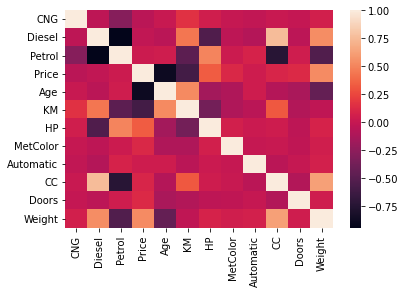

In [ ]:
# Finding and removing correlation

import seaborn as sns
data = updated_df
print(data.head())
count = 0
for val in data['Doors']:
  data.at[count, 'Doors'] = int(val)
  count+=1

corr = data.corr()
print(corr.head())

sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = Falsem

selected_columns = data.columns[columns]
data = data[selected_columns]

Write the correlation matrix generated for the following dataset. https://www.kaggle.com/code/asimislam/titanic-disaster-fe-eda-corr-ml/data?select=train.csv.

In [ ]:

import pandas as pd
 
 
# create dataframe from file
dataframe = pd.read_csv("/content/drive/MyDrive/SEM-VI/ML/train.csv")
 
# show dataframe
print(dataframe)
 
# use corr() method on dataframe to
# make correlation matrix
matrix = dataframe.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 